### Question 1

For each point in the complex plane $c = x + iy$, with $-2 < x < 2$ and $-2 < y < 2$, set $z_0 = 0$ and iterate the equation $z_{i + 1} = z_i^2 + c$. 
Note what happens to the $z_i$'s: some points will remain bounded in absolute value $|z|^2 = \Re(z)^2 + \Im(z)^2$, while others will run off to infinity. 
Make an image  in which your points $c$ that diverge are given one color and those that stay bounded are given another.
Make a second image where the points are coloured by a colourscale that indicates the iteration number at which the given point diverged.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-2,2, 300)
y = np.linspace(-2,2, 300)

x_1, y_1 = np.meshgrid(x,y)
i = 1j
c = x_1 + i*y_1

In [3]:
def iter_count(c, max_iter=300):
    """
    Returns the number of iterations it takes for each point z to either converge or diverge.
    
    Parameters:
    c ---- array: the array of complex number used in the computation of z.
    max_iter ---- int: the maximum number of iterations we consider.
    """
    z = 0
    for i in range(max_iter):
        z = z**2 + c
        
        if abs(z) > max_iter:
            return i
    return max_iter

In [4]:
vec_iter = np.vectorize(iter_count)
result = vec_iter(c)

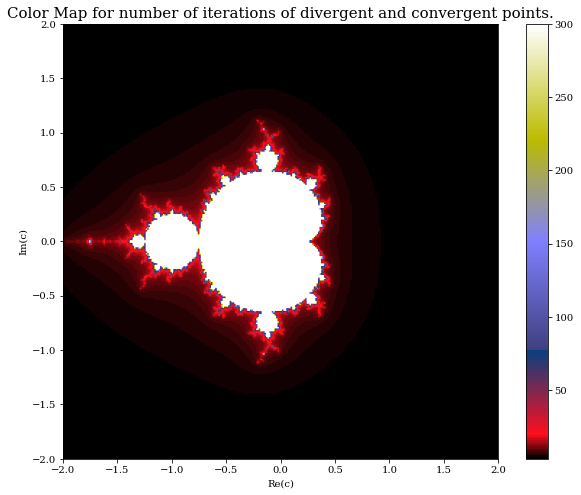

In [5]:
plt.rcParams['font.family'] = 'serif'

plt.figure(figsize=(10,8))
plt.imshow(result, cmap='gist_stern', extent=(-2,2,-2,2))
plt.title('Color Map for number of iterations of divergent and convergent points.', fontsize=15)
plt.xlabel('Re(c)')
plt.ylabel('Im(c)')
plt.colorbar()

Now making a binary plot of the points what diverged and the points that converged:

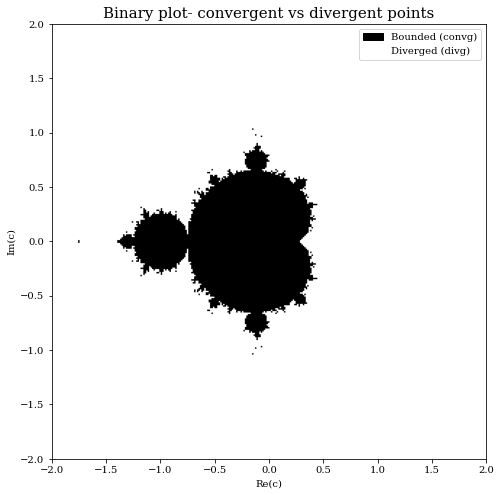

In [6]:
# binary plot
import matplotlib.patches as mpatches

# Create custom legend patches
black_patch = mpatches.Patch(color='black', label='Bounded (convg)')
white_patch = mpatches.Patch(color='white', label='Diverged (divg)')

binary_plot = (result < 50).astype(int)

plt.figure(figsize=(10,8))
plt.imshow(binary_plot, cmap='gray', extent=(-2,2,-2,2)) 
# plt.colorbar()
plt.title('Binary plot- convergent vs divergent points', fontsize=15)
plt.xlabel('Re(c)')
plt.ylabel('Im(c)')

plt.legend(handles=[black_patch, white_patch], loc='upper right')
plt.show()

### Question 2

One of the earliest demonstrations that deterministic physical systems could exhibit unpredictable behavior was given by Edward Lornez, a meteorologist. The original paper is \url{https://journals.ametsoc.org/view/journals/atsc/20/2/1520-0469_1963_020_0130_dnf_2_0_co_2.xml}, which is worth downloading and looking over.

Lorenz was interested in modeling the behavior of Earth's atmosphere, i.e., a thin atmosphere (thin relative to the radius of Earth) heated from below (the air is heated by infrared radiation from the ground, or by condensing water vapor in thunder clouds, rather than by sunlight). Lorenz applies a Fourier transform to the basic equations, and truncates the number of Fourier modes, keeping only three, with amplitudes denoted by $W\equiv(X, Y, Z)$.

The equations (Lorenz' equations 25, 26, and 27) are:

$\dot{X} = -\sigma(X-Y)$ <br>
$\dot{Y} = rX -Y - XZ$ <br>
$\dot{Z} = -bZ + XY$ <br>

The three dimensionless parameters are $\sigma$, the Prandtl number (the ratio of the kinematic viscosity to the thermal diffusivity), the Rayleigh number $r$ (which depends on the vertical temperature difference between the top and bottom of the atmosphere), and b, which is a dimensionless length scale. * Note that there are non-linear terms in the second and third equations; these terms result in very complex dynamics.

Your task is to:
- Code up the equations, using a function definition, with a proper docstrings (inside triple quotes)
- Use an ode solver of your choice, i.e., solve\_ivp, or ode, to integrate the equations for t=60 (in dimensionless time units). Use Lorenz' initial conditions $W_0=[0., 1., 0.]$ and his parameter values [$\sigma, r, b$] = [10., 28, 8./3.].
- Reproduce Lorenz' Figure 1. Label both axes! Note that Lorenz uses $N=t/\Delta{t}$ to label his plots (here $\Delta{t} =0.01$).
- Reproduce Lorenz' Figure 2. You will likely have to ask for output at very closely spaced time intervals, e.g., if you use solve\_ivp, you will need something like t = np.linspace(14, 19, 1000) followed by W = sol.sol(t). Again, label both axes.
- Now find the solution using the same values of $(\sigma, r, b)$, but this time with initial conditions very slightly different than $W_0$, say $W'_0 = W_0+[0., 1.e-8, 0] = [0., 1.00000001, 0.]$; note that adding the two lists (as indicated here) will not work, so you should google to find out how to add two lists element by element. Calculate the distance between $W'$ and $W$ as a function of time, and plot the result on a semilog plot (linear time, log distance). A straight line on such a plot, which is what Lorenz found, indicates exponential growth. Thus a small error in the initial condition will grow rapidly, meaning that predictions of future behavior will not be accurate.

In [7]:
# part 1, coding the equations

import numpy as np
import matplotlib.pyplot as plt

def my_lorentz(t, state, sigma=10, r=28, b=8/3):
    """ Returns the 3 Lorenz equations.
    Parameters:
    t ---- int: 
    state ---- array: the initial state of x, y and z.
    sigma ---- float: dimensionless parameter used in the computation.
    rho ---- float: parameter used in the computation.
    beta ---- float: parameter used in the computation.
    """
    
    # state is a vector of initial conditions (initial state of the system)
    x, y, z = state
    dxdt = -sigma*(x-y)
    dydt = x*(r-z) - y
    dzdt = x*y - b*z
    return np.array([dxdt, dydt, dzdt])

In [8]:
# part 2

from scipy.integrate import solve_ivp
import numpy as np

# setting initial conditions as in part 2

state = [0,1,0]
sigma, r, b = 10, 28, 8/3
t_span = (0,60)
t_evals = np.linspace(*t_span, 700) # unpacking the t_span tuple with *t_span

solution =  solve_ivp(my_lorentz, t_span, state, method='RK45', t_eval=t_evals)

In [9]:
# part 3

dt = 0.01
N = solution.t / dt

Text(0.5, 0.98, 'Time step N against solution Y(t) for various time step intervals')

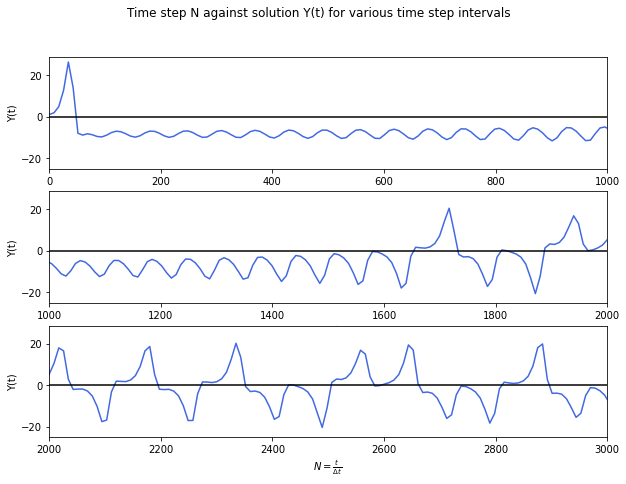

In [10]:
# part 3 - continued

# plotting figure 1 on 3 subplots

plt.rcParams['font.family'] = 'sans-serif'

fig, ax = plt.subplots(3, 1, figsize=(10,7))
ax[0].plot(N, solution.y[1], c='royalblue', label='x(t)')
ax[0].set_xlim(0,1000)
ax[0].axhline(0, c='k')
ax[0].set_xlabel('$N=\\frac{t}{\Delta t}$')
ax[0].set_ylabel('Y(t)')

ax[1].plot(N, solution.y[1], c='royalblue', label='y(t)')
ax[1].set_xlim(1000,2000)
ax[1].axhline(0, c='k')
ax[1].set_xlabel('$N=\\frac{t}{\Delta t}$')
ax[1].set_ylabel('Y(t)')

ax[2].plot(N, solution.y[1], c='royalblue', label='z(t)')
ax[2].set_xlim(2000,3000)
ax[2].axhline(0, c='k')
ax[2].set_xlabel('$N=\\frac{t}{\Delta t}$')
ax[2].set_ylabel('Y(t)')

fig.suptitle('Time step N against solution Y(t) for various time step intervals')


In [11]:
# part 4 - recreating Lorenz's Figure 2

t_span_2 = (14,19)
t_evals_2 = np.linspace(*t_span_2, 1000)

solution_2 = solve_ivp(my_lorentz, (0,60), state, method='RK45', t_eval=t_evals_2, dense_output=True)

W = solution_2.sol(t_evals_2)

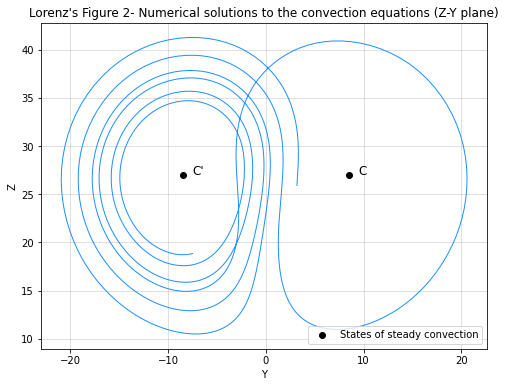

In [12]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(W[1], W[2], linewidth=1, c='dodgerblue')
ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.set_title('Lorenz\'s Figure 2- Numerical solutions to the convection equations (Z-Y plane)')
ax.grid(alpha=0.5)

# adding the points of steady convection
ax.scatter(6*(np.sqrt(2)), 27, c='k', label='States of steady convection') # C 
ax.text(6*(np.sqrt(2)) + 1, 27, 'C', fontsize=12)
ax.scatter(-6*(np.sqrt(2)), 27, c='k') # C prime
ax.text(-6*(np.sqrt(2)) + 1, 27, 'C\'', fontsize=12)
ax.legend(loc='lower right')

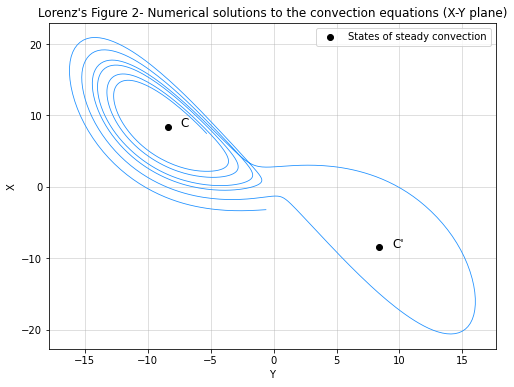

In [13]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(W[0], -W[1], linewidth=0.8, c='dodgerblue')
ax.set_xlabel('Y')
ax.set_ylabel('X')
ax.set_title('Lorenz\'s Figure 2- Numerical solutions to the convection equations (X-Y plane)')
ax.grid(alpha=0.5)

# adding the points of steady convection
ax.scatter(-8.4, 8.4, c='k', label='States of steady convection') # C 
ax.text(-7.4, 8.4, 'C', fontsize=12)
ax.scatter(8.4, -8.4, c='k') # C prime
ax.text(9.4, -8.4, 'C\'', fontsize=12)
ax.legend(loc='upper right')

In [14]:
# part 5

# recall initial state was state = [0,1,0]
# computing the new initial condition
delta_w = [0, 1e-8, 0]
w_prime = [a+b for a, b in zip(state, delta_w)]

# solving for both initial conditions
t_evals_2 = np.linspace(0, 60, 1000)
sol_2_2 = solve_ivp(my_lorentz, (0,60), state, method='RK45', t_eval=t_evals_2, dense_output=True)
W_2 = sol_2_2.sol(t_evals_2)

sol_3 = solve_ivp(my_lorentz, (0,60), w_prime, method='RK45', t_eval=t_evals_2, dense_output=True)
W_prime = sol_3.sol(t_evals_2) # contains the slightly different solutions based on the slight change of initial conditions

In [15]:
# finding the differences between the solutions of the systems 
diff_w = W_prime - W_2

# taking the transpose of the (3,1000) array diff_w so that we have every point at successive time t for each x, y and z
diff_w_T = diff_w.T

# computing the euclidean distance in 3d space
distances = np.linalg.norm(diff_w_T, axis=1)

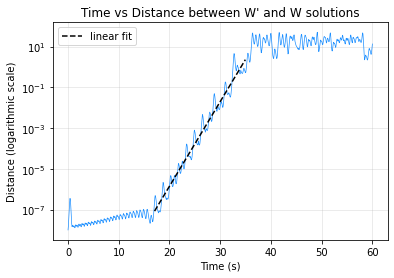

In [16]:
# plotting the results

plt.plot(figsize=(10,8))
time_ax = np.linspace(0,60,1000)
plt.plot(time_ax, distances, linewidth=0.7, c='dodgerblue')
plt.semilogy()
plt.grid(linewidth=0.5, alpha=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Distance (logarithmic scale)')
plt.title('Time vs Distance between W\' and W solutions')

# adding a linear fit line to the linear trend (for visual appeal)

# filtering time interval for a linear fit of the noisy data
time_int = (time_ax >= 17) & (time_ax <= 35)
x_fit = time_ax[time_int]
y_fit = distances[time_int]

# taking positive values for the y axis log scale
valid = y_fit > 0
x_fit = x_fit[valid]
y_fit = y_fit[valid]

# take log of y and fit linear line
log_y = np.log(y_fit)
coeffs = np.polyfit(x_fit, log_y, 1)  # coeffs = [slope, intercept], 1 for poly of deg 1

# create the line
y_fit_line = np.exp(coeffs[0] * x_fit + coeffs[1])

# plot
plt.plot(x_fit, y_fit_line, color='k', linestyle='--', label='linear fit')
plt.legend()